In [17]:
import random
import matplotlib.pyplot as plt
from collections import defaultdict

In [9]:
class Dice(object):
    def roll(self):
        return random.randint(1,6)
    
die = Dice()

print(die.roll())

4


In [16]:
dice_rolls = defaultdict(int)

for _ in range(10000):
    num = random.randint(1,6)
    dice_rolls[num] += 1
    
dice_rolls

defaultdict(int, {1: 1695, 4: 1619, 6: 1705, 2: 1661, 5: 1700, 3: 1620})

In [20]:
plt.bar

<function matplotlib.pyplot.bar(x, height, width=0.8, bottom=None, *, align='center', data=None, **kwargs)>

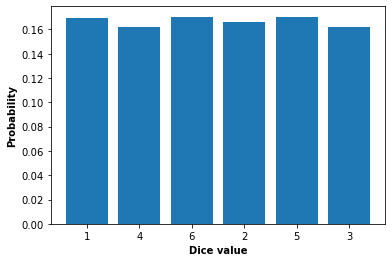

In [27]:
plt.bar(range(len(dice_rolls)),height = [rolls/10000 for rolls in dice_rolls.values()])
plt.xticks(range(len(dice_rolls)),labels = dice_rolls.keys())
plt.xlabel('Dice value',fontweight='bold')
plt.ylabel('Probability',fontweight='bold')
plt.show()

In [33]:
scores = {
    
     1:100
    ,2:0
    ,3:0
    ,4:0
    ,5:50
    ,6:0
    
    
}

In [85]:
class Player(object):
    pid = 1
    def __init__(self,turns):
        self.pid = Player.pid
        self.isin = False
        self.score = 0
        self.turns = turns
        
        Player.pid +=1 
        
    def __repr__(self):
        return "".join(['pid: ',str(self.pid)," score: ",str(self.score)," default turns: ",str(self.turns)])
    
    def turn(self):
        self.score += self.play()
        
    def play(self):
        temp_score = 0
        
        if self.isin:
            for turn in range(self.turns):
                roll_score = self.check_score(self.rolls())
                if roll_score == 0:
                    return 0 
                else:
                    temp_score += roll_score
                    
            return temp_score

            
        else:
            for turn in range(3):
                temp_score += self.check_score(self.rolls())
                
            if temp_score >= 300:
                self.isin = True
                return temp_score
            else:
                return 0 
        
        
    def roll(self):
        return Dice().roll()
    
    def rolls(self):
        return [self.roll() for _ in range(3)]
    
    def check_score(self,rolls):
        sorted_rolls = sorted(rolls)
        
        if sorted_rolls[0] == sorted_rolls[-1]:
            return sorted_rolls[0] * 100
        else:
            return sum([scores[roll] for roll in rolls])

In [86]:
player = Player(3)

player.turn()
print(player.isin)
print(player.score)

player.turn()
print(player.isin)
print(player.score)

player.turn()
print(player.isin)
print(player.score)

player.turn()
print(player.isin)
print(player.score)


False
0
False
0
False
0
True
300


In [117]:
class Game(object):
    def __init__(self,players,final_score):
        #self.players = [Player(random.randint(1,10)) for _ in range(num_players)]
        self.players = players
        self.final_score = final_score
        self.winner = None
        self.over = False
        
    def play(self):
        while not self.over:
            for player in self.players:
                player.turn()
                if player.score >= self.final_score:
                    self.winner = player
                    self.over = True
                    return 
        

In [136]:
players = [Player(turns) for turns in range(1,20)]
random.shuffle(players)
game = Game(players,5000)
game.play()
print(game.winner)
game.players

pid: 183 score: 5100 default turns: 4


[pid: 195 score: 300 default turns: 16,
 pid: 184 score: 2400 default turns: 5,
 pid: 197 score: 300 default turns: 18,
 pid: 186 score: 1050 default turns: 7,
 pid: 190 score: 300 default turns: 11,
 pid: 187 score: 2700 default turns: 8,
 pid: 181 score: 2900 default turns: 2,
 pid: 189 score: 1300 default turns: 10,
 pid: 191 score: 2200 default turns: 12,
 pid: 192 score: 300 default turns: 13,
 pid: 182 score: 2800 default turns: 3,
 pid: 185 score: 3150 default turns: 6,
 pid: 183 score: 5100 default turns: 4,
 pid: 180 score: 1500 default turns: 1,
 pid: 198 score: 300 default turns: 19,
 pid: 194 score: 300 default turns: 15,
 pid: 188 score: 1700 default turns: 9,
 pid: 193 score: 300 default turns: 14,
 pid: 196 score: 300 default turns: 17]

In [138]:
players[0].score

300

In [139]:
game.winner

pid: 183 score: 5100 default turns: 4